<a href="https://colab.research.google.com/github/FlierK254/Dholuo-Swahili-Neural-Machine-Translator/blob/main/Copy_of_Financial_Health_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required datasets at hand.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import the required libraries accordingly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Read our dataset using the pandas library

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diaries_transactions_all.csv", header=0, skiprows=[4144,125092,14784,12602, 21292, 23459, 25582])

In [ ]:
df.head(5)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03-Sep-12,02-Oct-13,394,13,04=Diaries Interview,02-Oct-13,10,2013,2013_10,08-Sep-12,5.81347E+16,1.0,5.81344E+16,NaN,Asset,Close,Informal,Less liquid,02-Oct-13,02-Oct-13,0,0,1.081380e+17,5.81344E+16,02-Oct-13,10,2013,2013_10,18.0,394,13,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24-Sep-12,19-Sep-13,360,12,04=Diaries Interview,22-Apr-13,4,2013,2013_04,20-Aug-12,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16-Aug-12,31-Dec-13,502,17,5.913670e+16,5.91344E+16,21-Apr-13,4,2013,2013_04,10.0,209,7,248,8,cash,"Cash (Cash on hand; cash lost, stolen or missing)",CASH,Cash,3499,Cash on hand now,Cash on hand now (end of period),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20-Sep-12,22-Oct-13,397,13,04=Diaries Interview,02-Oct-13,10,2013,2013_10,05-Sep-12,5.61348E+16,NaN,6.51344E+16,NaN,Liability,Close,Informal,NaN,17-Oct-12,02-Oct-13,350,12,1.051380e+17,6.51344E+16,02-Oct-13,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21-Sep-12,01-Nov-13,406,14,04=Diaries Interview,21-Feb-13,2,2013,2013_02,07-Sep-12,6.1135E+16,NaN,6.11344E+16,NaN,Asset,NaN,Informal,More liquid,12-Oct-12,02-Oct-13,355,12,6.113620e+16,6.11344E+16,07-Feb-13,2,2013,2013_02,6.0,139,4,118,4,findev,"Borrowing, lending, savings or insurance media...",INFSAVHOM,Informal savings: keep money at home,3405,Keeping Money (Cash) at Home,3. Withdrawals,Withdrawal on financial asset,0.0,Decrease,1.0,Cash,NaN,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20-Sep-12,18-Oct-13,393,13,04=Diaries Interview,02-May-13,5,2013,2013_05,29-Aug-12,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16-Aug-12,31-Dec-13,502,17,6.113670e+16,6.11345E+16,28-Mar-13,3,2013,2013_03,8.0,189,6,224,7,opex,Operational (Personal or household) expenditur...,COMM,Communications,2787,Pre-paid phone credit and data bundles,Purchases,NaN,NaN,NaN,1.0,Cash,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


### Data preprocessing and viewing our data
##### Rename columns
##### Check for our columns datatypes
##### Check for nulls


---



In [ ]:
## Check type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483942 entries, 0 to 483941
Data columns (total 58 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   hh_ids                      483942 non-null  object 
 1   unique_hhs                  298 non-null     float64
 2   first_trx_date_hh           483942 non-null  object 
 3   last_trx_date_hh            483942 non-null  object 
 4   tot_hh_daysofobs            483942 non-null  int64  
 5   tot_hh_monthsofobs          483942 non-null  int64  
 6   interview_designation       483674 non-null  object 
 7   int_date                    483942 non-null  object 
 8   int_month                   483942 non-null  int64  
 9   int_year                    483942 non-null  int64  
 10  int_yr_mo                   483942 non-null  object 
 11  first_int_date              483942 non-null  object 
 12  account_ids                 483942 non-null  object 
 13  unique_accnts 

In [ ]:
df.rename(columns={'trx_date':'transaction_date','trx_month':'transaction_month','trx_year':'transaction_year','trx_yr_mo':'transaction_year_month'}, inplace=True)

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 483942
Number of columns: 58


#### Detect the missing values in a code

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 58 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
unique_hhs,483644,99.9
unique_hm_owner,483272,99.9
account_startclose_balance,477000,98.6
unique_accnts,474397,98.0
trx_inkind_value_usd,471144,97.4
trx_inkind_value_kes,471144,97.4
trx_inkind_units,470518,97.2
account_liquid,434022,89.7
trx_prx_purpose_fd,423992,87.6
trx_bsheet_direction,412747,85.3


#### Drop Na with values that are greater than 7000

In [ ]:
def drop_columns_with_high_missing_values(df, threshold=6):

    # Calculate percentage of missing values for each column
    missing_percentages = 100 * df.isnull().sum() / len(df)

    # Identify columns where missing percentage exceeds the threshold
    columns_to_drop = missing_percentages[missing_percentages > threshold].index

    # Drop the identified columns from the DataFrame
    cleaned_df = df.drop(columns_to_drop, axis=1)

    return cleaned_df


In [ ]:
cleaned_df = drop_columns_with_high_missing_values(df)
cleaned_df.dropna(inplace=True)



In [ ]:
cleaned_df.isnull().sum()

hh_ids                     0
first_trx_date_hh          0
last_trx_date_hh           0
tot_hh_daysofobs           0
tot_hh_monthsofobs         0
interview_designation      0
int_date                   0
int_month                  0
int_year                   0
int_yr_mo                  0
first_int_date             0
account_ids                0
m_ids_owner                0
first_trx_date_acc         0
last_trx_date_acc          0
tot_acc_daysofobs          0
tot_acc_monthsofobs        0
trx_id                     0
m_ids_trx                  0
transaction_date           0
transaction_month          0
transaction_year           0
transaction_year_month     0
trx_dq_round               0
trx_stdtime_days_hh        0
trx_stdtime_mnths_hh       0
trx_stdtime_days_acc       0
trx_stdtime_mnths_acc      0
trx_class_code             0
trx_class_desc             0
trx_family_code            0
trx_family_desc            0
trx_type_code              0
trx_type_desc              0
trx_prx_purpos

In [ ]:
data = cleaned_df.to_csv('/content/clean_diaries.csv', index=False)

In [ ]:
cleaned = pd.read_csv('/content/clean_diaries.csv')

In [ ]:
cleaned.shape

(453511, 44)

# Input Features


#### 1.DateTransaction
Date of the transaction, providing temporal information.

#### 2.FamilyTransaction
Type of transaction family (e.g., deposits, withdrawals), indicating the nature of the financial activity.

#### 3.PurposeTransaction
Purpose or description of the transaction, providing context for the financial activity (e.g., savings contributions, loan repayments).

#### 4.ModeTransaction
Mode of the transaction (e.g., cash, mobile money transfer, bank transfer), indicating the payment method used.

#### 5.Value (KES)
Monetary value associated with each transaction, providing information on the amount of money involved.

#### 6.Transaction direction
Direction of the transaction (inflow or outflow), indicating whether money is entering or leaving the household.


In [ ]:
# View the columns
cleaned.columns

Index(['hh_ids', 'first_trx_date_hh', 'last_trx_date_hh', 'tot_hh_daysofobs', 'tot_hh_monthsofobs',
       'interview_designation', 'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'm_ids_owner', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx', 'transaction_date',
       'transaction_month', 'transaction_year', 'transaction_year_month', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc', 'trx_family_code',
       'trx_family_desc', 'trx_type_code', 'trx_type_desc', 'trx_prx_purpose', 'trx_mode_code',
       'trx_mode_desc', 'trx_place_incommunity', 'trx_distance_km', 'trx_direction',
       'trx_value_kes', 'trx_value_usd', 'ddd_gift', 'trx_stdtime_mnths_hh_nr'],
      dtype='object')

In [ ]:
cleaned.head(5)

,hh_ids,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,m_ids_owner,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,transaction_date,transaction_month,transaction_year,transaction_year_month,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_stdtime_mnths_hh_nr
0,KMOMB07,21-Sep-12,01-Oct-13,375,12,06=Cleaning interview,02-Oct-13,10,2013,2013_10,21-Sep-12,5.71375E+16,5.71344E+16,03-Jan-13,01-Oct-13,271,9,5.713920e+16,5.71344E+16,02-May-13,5,2013,2013_05,21.0,223,7,119,4,findev,"Borrowing, lending, savings or insurance media...",EMPLN,Loan from employer,2751,Loan from employer,3. Payments,16.0,Automatic,0.0,1.651430,Outflow,5000.0,58.823530,0,7.689655
1,KMOMT18,25-Sep-12,12-Nov-13,413,14,04=Diaries Interview,25-Oct-12,10,2012,2012_10,29-Aug-12,HH,HH,16-Aug-12,31-Dec-13,502,17,6.113520e+16,6.11344E+16,17-Oct-12,10,2012,2012_10,2.0,22,0,62,2,opex,Operational (Personal or household) expenditur...,FOOD,Food,4201,Multi-item shopping trips--THE SHOP,Purchases,1.0,Cash,0.0,8.085859,Outflow,2816.0,33.129410,0,0.758621
2,KMAKL13,01-Oct-12,02-Oct-13,366,12,04=Diaries Interview,29-May-13,5,2013,2013_05,03-Sep-12,HH,HH,16-Aug-12,31-Dec-13,502,17,6.513700e+16,6.51344E+16,23-May-13,5,2013,2013_05,12.0,234,8,280,9,opex,Operational (Personal or household) expenditur...,MED,Medical,2793,Medicines,Purchases,1.0,Cash,1.0,0.000000,Outflow,40.0,0.470588,0,8.068966
3,KMAKL21,28-Sep-12,04-Oct-13,371,12,04=Diaries Interview,04-Oct-13,10,2013,2013_10,28-Sep-12,HH,HH,16-Aug-12,31-Dec-13,502,17,6.513810e+16,6.51344E+16,28-Sep-13,9,2013,2013_09,22.0,365,12,408,14,opex,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,0.000000,Outflow,50.0,0.588235,0,12.586210
4,KELDL02,03-Sep-12,02-Oct-13,394,13,04=Diaries Interview,19-May-13,5,2013,2013_05,08-Sep-12,5.81345E+16,5.81344E+16,27-Sep-12,01-Oct-13,369,12,1.081370e+17,5.81344E+16,18-Mar-13,3,2013,2013_03,8.0,196,6,172,5,income,Income (includes agricultural or business expe...,CITMPC,Casual/temp employment,2825,"Casual employment, vibarua","1. Income, wages, tips, comissions",1.0,Cash,1.0,0.000000,Inflow,500.0,5.882353,0,6.758621


In [ ]:
cleaned.shape

(453511, 44)

In [ ]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453511 entries, 0 to 453510
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hh_ids                   453511 non-null  object 
 1   first_trx_date_hh        453511 non-null  object 
 2   last_trx_date_hh         453511 non-null  object 
 3   tot_hh_daysofobs         453511 non-null  int64  
 4   tot_hh_monthsofobs       453511 non-null  int64  
 5   interview_designation    453511 non-null  object 
 6   int_date                 453511 non-null  object 
 7   int_month                453511 non-null  int64  
 8   int_year                 453511 non-null  int64  
 9   int_yr_mo                453511 non-null  object 
 10  first_int_date           453511 non-null  object 
 11  account_ids              453511 non-null  object 
 12  m_ids_owner              453511 non-null  object 
 13  first_trx_date_acc       453511 non-null  object 
 14  last

In [ ]:
def check_null_values(df):
    """
    Function to check for null values and their percentages in each column of the DataFrame.

    Parameters:
        df (pandas.DataFrame): Input DataFrame to be analyzed.

    Returns:
        dict: A dictionary containing columns as keys and their respective null percentages as values.
    """
    null_counts = df.isnull().sum()
    total_rows = df.shape[0]
    null_percentages = (null_counts / total_rows) * 100

    null_summary = {}
    for col in df.columns:
        null_summary[col] = null_percentages[col]

    return null_summary

In [ ]:
def outline_unique_variables(df):
    """
    Function to outline unique variables in each column of the DataFrame.

    Parameters:
        df (pandas.DataFrame): Input DataFrame to be analyzed.

    Returns:
        dict: A dictionary containing columns as keys and their unique variables as values.
    """
    unique_summary = {}
    for col in df.columns:
        unique_summary[col] = df[col].unique()

    return unique_summary



In [ ]:
def analyze_data(df):
    """
    Function to analyze the given DataFrame by checking null values and outlining unique variables in specified columns.

    Parameters:
        df (pandas.DataFrame): Input DataFrame to be analyzed.

    Returns:
        None
    """

    columns_to_analyze = ['trx_class_code', 'trx_class_desc', 'trx_family_code', 'trx_family_desc', 'trx_type_desc', 'trx_prx_purpose', 'trx_place_incommunity', 'trx_direction']

    # Filtering DataFrame to include specified columns
    df_subset = df[columns_to_analyze]

    null_summary = check_null_values(df_subset)
    unique_summary = outline_unique_variables(df_subset)

    print("Null Value Summary:")
    print("-------------------")
    for col, null_percentage in null_summary.items():
        print(f"{col}: {df_subset[col].isnull().sum()} null values ({null_percentage:.2f}%)")

    print("\nUnique Variables Summary:")
    print("-------------------------")
    for col, unique_values in unique_summary.items():
        print(f"{col}: {len(unique_values)} unique variables")
        print(unique_values)
        print()

analyze_data(cleaned)


Null Value Summary:
-------------------
trx_class_code: 0 null values (0.00%)
trx_class_desc: 0 null values (0.00%)
trx_family_code: 0 null values (0.00%)
trx_family_desc: 0 null values (0.00%)
trx_type_desc: 0 null values (0.00%)
trx_prx_purpose: 0 null values (0.00%)
trx_place_incommunity: 0 null values (0.00%)
trx_direction: 0 null values (0.00%)

Unique Variables Summary:
-------------------------
trx_class_code: 4 unique variables
['findev' 'opex' 'income' 'assets']

trx_class_desc: 4 unique variables
['Borrowing, lending, savings or insurance mediated through any financial device/ institution'
 'Operational (Personal or household) expenditure for any purpose'
 'Income (includes agricultural or business expenses) from any source'
 'Asset purchase or sale']

trx_family_code: 40 unique variables
['EMPLN' 'FOOD' 'MED' 'CITMPC' 'COMM' 'SEI' 'CLN' 'INFGRP' 'EDU' 'ENRGY'
 'PERS' 'MOBMNY' 'AGRI' 'INFP2P' 'REL' 'H20' 'FRMSAVWA' 'TRNSP' 'RR' 'OTH'
 'ALC' 'INFSAVHOM' 'FRMINS' 'HSNG' 'RG' 'S

In [ ]:
print(df[['trx_place_incommunity', 'trx_direction']].isnull().sum())


trx_place_incommunity    26240
trx_direction            14911
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483942 entries, 0 to 483941
Data columns (total 58 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   hh_ids                      483942 non-null  object 
 1   unique_hhs                  298 non-null     float64
 2   first_trx_date_hh           483942 non-null  object 
 3   last_trx_date_hh            483942 non-null  object 
 4   tot_hh_daysofobs            483942 non-null  int64  
 5   tot_hh_monthsofobs          483942 non-null  int64  
 6   interview_designation       483674 non-null  object 
 7   int_date                    483942 non-null  object 
 8   int_month                   483942 non-null  int64  
 9   int_year                    483942 non-null  int64  
 10  int_yr_mo                   483942 non-null  object 
 11  first_int_date              483942 non-null  object 
 12  account_ids                 483942 non-null  object 
 13  unique_accnts 

#Conversion of String Values into Numerical Values

In [ ]:
#0.trx_class_desc

# Define a mapping of categories to numerical values
category_mapping = {
    'Borrowing, lending, savings or insurance mediated through any financial device/ institution': 0,
    'Operational (Personal or household) expenditure for any purpose': 1,
    'Income (includes agricultural or business expenses) from any source': 2,
    'Asset purchase or sale': 3
}

# Map the categories to numerical values
cleaned['trx_class_numeric'] = cleaned['trx_class_desc'].map(category_mapping)


In [ ]:
#1.trx_family_code
# Define a mapping of categories to numerical values
category_mapping = {
    'EMPLN': 0, 'FOOD': 1, 'MED': 2, 'CITMPC': 3, 'COMM': 4,
    'SEI': 5, 'CLN': 6, 'INFGRP': 7, 'EDU': 8, 'ENRGY': 9,
    'PERS': 10, 'MOBMNY': 11, 'AGRI': 12, 'INFP2P': 13, 'REL': 14,
    'H20': 15, 'FRMSAVWA': 16, 'TRNSP': 17, 'RR': 18, 'OTH': 19,
    'ALC': 20, 'INFSAVHOM': 21, 'FRMINS': 22, 'HSNG': 23, 'RG': 24,
    'SALE': 25, 'REI': 26, 'SUPPCRD': 27, 'CLTH': 28, 'FRMSAVRA': 29,
    'PRCH': 30, 'ADVANCE': 31, 'NEINCG': 32, 'RIOI': 33, 'PSTHR': 34,
    'FRMLN': 35, 'LAYAWAY': 36, 'OTHER': 37, 'ENT': 38, 'PAWN': 39
}

# Map the categories to numerical values
cleaned['trx_family_code_numeric'] = cleaned['trx_family_code'].map(category_mapping)


In [ ]:
# 2.trx_class_code: 5 unique variables
# ['findev' 'cash' 'opex' 'income' 'assets']

from sklearn.preprocessing import LabelEncoder

def label_encode_without_nan(df, column):
    # Copy the DataFrame to avoid modifying the original
    encoded_df = df.copy()

    # Drop rows with NaN values in the specified column
    encoded_df = encoded_df.dropna(subset=[column])

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Encode the specified column
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

    return encoded_df

cleaned = label_encode_without_nan(cleaned, 'trx_class_code')


#3.trx_type_desc

With 175 unique categories in the trx_type_desc column, directly assigning numerical values to each category might not be the best approach due to the large number of unique variables. Instead, we considered  using techniques like label encoding or frequency encoding.

## Not Suitable Method
Label Encoding

Label encoding assigns a unique integer to each category. It's straightforward but might not be ideal for this many unique values because it implies ordinality that doesn't necessarily exist.

#Most Suitable
Frequency Encoding

Frequency encoding replaces each category with the frequency of its occurrence in the dataset. This can help capture some information about the categories' importance in the dataset.

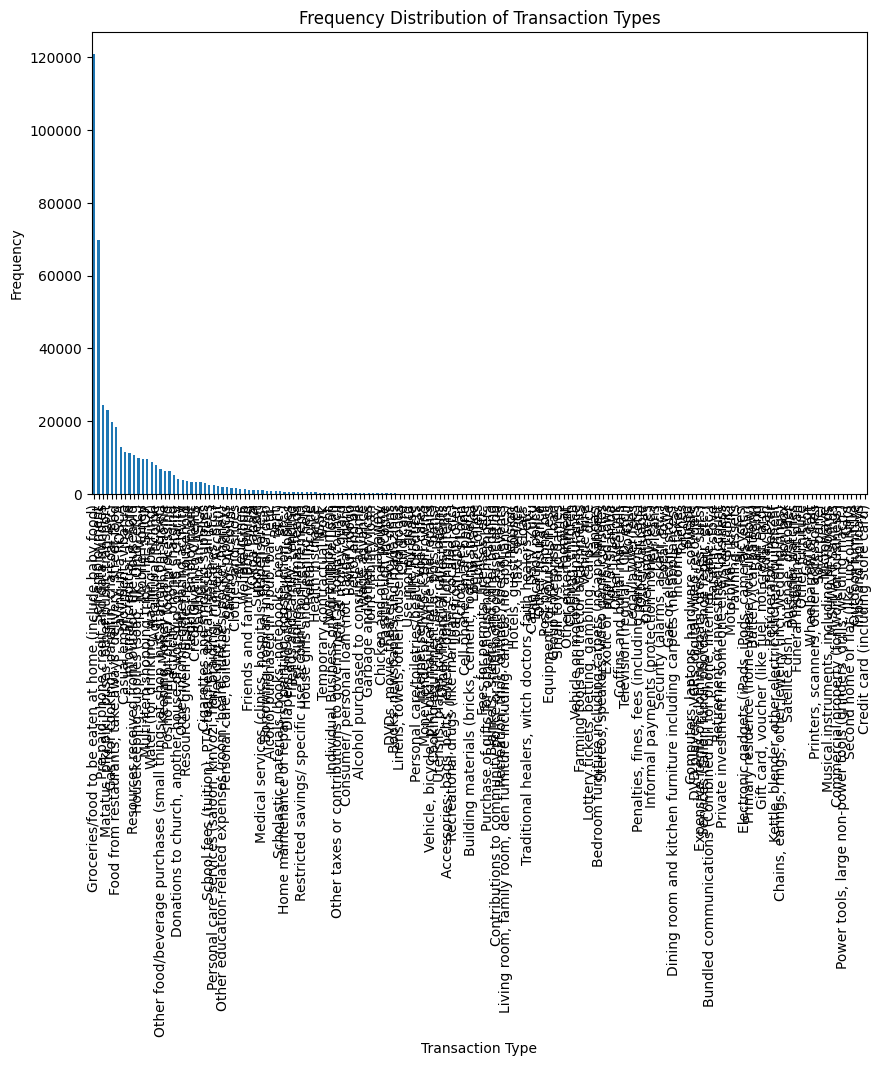

Frequency counts:
trx_type_desc
Groceries/food to be eaten at home (include baby food)                          120890
Self-employment                                                                  69874
Pre-paid phone credit and data bundles                                           24428
Matatus, piki piki,  buses, other public transport                               22983
Gas (for cooking), paraffin, charcoal, etc.                                      19728
Food from restaurants, take aways, delivery, street food                         18288
Saving in a ROSCA                                                                12787
Casual employment, vibarua                                                       11646
Informal credit at a store                                                       11310
Resources received from outside the household                                    10630
Housekeeping supplies (soap, Jik, Omo, etc.)                                      9979
Mobile Mone

In [ ]:
import matplotlib.pyplot as plt

# Calculate frequency counts
frequency_counts = cleaned['trx_type_desc'].value_counts()

# Plot histogram
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Transaction Types')
plt.show()

# Analyze frequency distribution
print("Frequency counts:")
print(frequency_counts)

In [ ]:
# Check if any category has very low frequencies
low_frequency_threshold = 10  # Define a threshold for low frequencies
low_frequency_categories = frequency_counts[frequency_counts < low_frequency_threshold]
if not low_frequency_categories.empty:
    print("\nCategories with low frequencies:")
    print(low_frequency_categories)
else:
    print("\nNo categories have low frequencies.")

# Check if the distribution is skewed
skew_threshold = 0.5  # Defining a threshold for skewness
skewness = frequency_counts.skew()
if abs(skewness) > skew_threshold:
    print("\nThe distribution is skewed (skewness = {:.2f}).".format(skewness))
else:
    print("\nThe distribution is not skewed (skewness = {:.2f}).".format(skewness))



Categories with low frequencies:
trx_type_desc
Income taxes                                                               9
Torches                                                                    9
Sheep                                                                      9
Computers, laptops, hardware, software                                     8
DVD players, VCRs, digital video recorders                                 8
Expensive items of clothing (coats, dresses, suits)                        7
Services (tailor, fundi, photos, shoe repair, etc.)                        7
Bundled communications (Combined bill for phone, internet, cable, etc.)    7
Paraffin stove                                                             7
Retirement or investment account                                           7
Private investment in someone else's business                              6
Water tanks                                                                6
Motorbike, Piki-Piki        

 Given the distribution, it seems that most categories have relatively high frequencies, but there are indeed several categories with low frequencies. With a positively skewed distribution and a significant number of low-frequency categories, frequency encoding could still be a viable option.





In [ ]:
# Calculate the frequency of each category
frequency_map = cleaned['trx_type_desc'].value_counts(normalize=True)

# Map the categories to their frequencies
cleaned['trx_type_desc_numeric'] = cleaned['trx_type_desc'].map(frequency_map)


##4.trx_prx_purpose


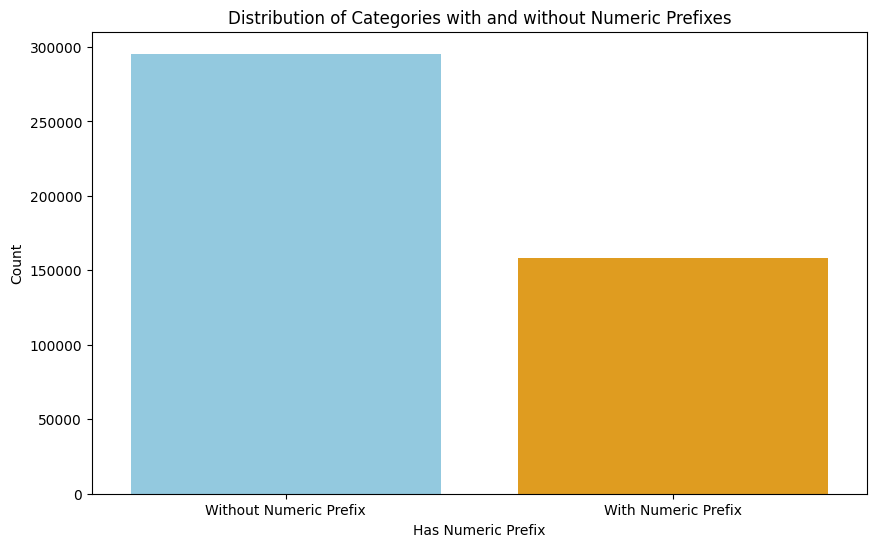

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the numeric prefix from each category
cleaned['has_numeric_prefix'] = cleaned['trx_prx_purpose'].str.startswith(tuple(str(i) for i in range(10)))

# Plot the distribution of categories with and without numeric prefixes
plt.figure(figsize=(10, 6))
sns.countplot(x='has_numeric_prefix', data=cleaned, palette=['skyblue', 'orange'])
plt.title('Distribution of Categories with and without Numeric Prefixes')
plt.xlabel('Has Numeric Prefix')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Without Numeric Prefix', 'With Numeric Prefix'])
plt.show()


The code below ensures that uncategorized values are assigned to a general category like 'Other' and then encoded into numerical values using label encoding.


In [ ]:
# Define a mapping of standardized categories
category_mapping = {
    # Existing categories remain the same
    '3. Payments': 'Payments',
    'Purchases': 'Purchases',
    '1. Income, wages, tips, comissions': 'Income',
    '1. Revenue or Sales': 'Income',
    '2. Deposits--Contributions': 'Deposits',
    'Payments and purchases': 'Payments & Purchases',
    'Payments': 'Payments',
    '2. Deposit': 'Deposits',
    '1. Agricultural Revenues (Sales)': 'Income',
    '2. New sales on credit': 'Income',
    '3. Withdrawals, transfers, debits': 'Withdrawals',
    '2. New purchases on credit': 'Purchases',
    '2. Deposits': 'Deposits',
    'Resources received': 'Income',
    '3. Stock purchases': 'Purchases',
    '4. Expenses (eg.rent, transport, electricity)': 'Expenses',
    '2. Labour (workers on fields)': 'Labour',
    '3. Withdrawals': 'Withdrawals',
    '1. Payments or contributions': 'Payments',
    '3. Withdrawals--payout of fund to you': 'Withdrawals',
    '2. New borrowing': 'Borrowing',
    'Resources given': 'Income',
    '2. Sale': 'Sales',
    '1. All gross wages, bonuses, comissions': 'Income',
    'Repayment of outstanding credit w top up': 'Repayment',
    '2. Wages and benefits paid to workers': 'Income',
    '3. Repayments': 'Repayment',
    '1. Purchase': 'Purchases',
    '2. New purchase on credit': 'Purchases',
    'New airtime on credit/new borrowing': 'Borrowing',
    '2. New lending': 'Lending',
    '2. Accepting new deposits': 'Deposits',
    '1. Income received': 'Income',
    'Fee--for someone delivering money': 'Fees',
    '1. Income': 'Income',
    '2. Deposit or Contributions': 'Deposits',
    '2. Passing onto recipient': 'Other',
    '2. New contribution or deposit': 'Deposits',
    '1. Income from rental': 'Income',
    '4. Any known fees, penalties, food/host co': 'Fees',
    '3. Providing withdrawals': 'Withdrawals',
    '3. Expenses (Seed, fertilizer, plow, etc...)': 'Expenses',
    '2. Deposits, buying new investments': 'Deposits',
    '5. Kitu kidogo': 'Other',
    '2. Tax withholdings': 'Taxes',
    '4. Any known fees, penalties, food/host costs': 'Fees',
    'Purchases & Payments': 'Payments & Purchases',
    '7. Refund from lender': 'Refund',
    '2. Payouts or claims': 'Payouts',
    '1. Income received for someone else': 'Income',
    '3. Payments--individual portion': 'Payments',
    '3. Taking good': 'Withdrawals',
    '2. Deposits or contributions': 'Deposits',
    '1. Payments of premiums': 'Payments',
    '2. New purchase on credit--total value': 'Purchases',
    '2. New borrowinng': 'Borrowing',
    '2. New borrowinng (individual portion)': 'Borrowing',
    '2. Payouts, claims and cash back': 'Payouts',
    '2. Expenses you pay related to rental': 'Expenses',
    '2. Adding value': 'Other',
    '3. Withdrawal or sales of investment': 'Withdrawals',
    '2. New investments into business': 'Investments',
    '3.Early withdrawals or borrowing from pensio': 'Withdrawals',
    '3. Withdrawals or sales of investments': 'Withdrawals',
    '2. New borrowing--individual portion': 'Borrowing',
    'Payments (aside from payroll deductions)': 'Payments',
    '5. Fee': 'Fees',
    '3. Union Dues': 'Union Dues',
    '2. Deposits, contributions, new investment': 'Deposits',
    '3. Withdrawals or payouts': 'Withdrawals',
    '3. Using value': 'Withdrawals',
    '3. Being refunded': 'Refund',
    '2. Paying for Bond': 'Payments',
    # Assigning 'Payments & Purchases' to a new category 'Transactions'
    'Payments & Purchases': 'Transactions',
    # Uncategorized values
    '': 'Other'
}

# Map the categories to their standardized values
cleaned['trx_prx_purpose_standardized'] = cleaned['trx_prx_purpose'].map(category_mapping)

# Check if any values remain uncategorized
uncategorized_values = cleaned[cleaned['trx_prx_purpose_standardized'].isna()]['trx_prx_purpose'].unique()
if uncategorized_values:
    print("Uncategorized values:", uncategorized_values)

# Encode the standardized categories into numerical values using label encoding
cleaned['trx_prx_purpose_numeric'] = cleaned['trx_prx_purpose_standardized'].astype('category').cat.codes


#5. trx_direction

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'trx_direction' column
cleaned['trx_direction_numeric'] = label_encoder.fit_transform(cleaned['trx_direction'])

# Display the mapping of original values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numeric_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numeric_value}")

# Display the first few rows of the DataFrame with the new numerical column
print(cleaned[['trx_direction', 'trx_direction_numeric']].head())


Mapping of original values to numerical values:
Inflow: 0
Outflow: 1
  trx_direction  trx_direction_numeric
0       Outflow                      1
1       Outflow                      1
2       Outflow                      1
3       Outflow                      1
4        Inflow                      0


#6.trx_mode_desc

In [ ]:
# Check unique variables in the 'trx_mode_desc' column
unique_values = df['trx_mode_desc'].unique()

# Print unique variables
print("Unique variables in 'trx_mode_desc' column:")
for value in unique_values:
    print(value)


Unique variables in 'trx_mode_desc' column:
CLOSING BALANCE
nan
Cash
STARTING BALANCE
Purchase on credit/arrears
Automatic
Mobile money transfer (M-PESA, Airtel Money, Orange Money, Yu Cash, Tangaza, etc)
Transfer into bank, SACCO, or MFI account
Airtime exchange, sambaza
In-kind (trade, good, service--NOT MONEY)
Looking for work or business opportunities
Standing order
Hire purchase
Layaway
Points from loyalty card, smart card, Bonga points
Debit card
Cheque or money order
Wire over Western Union, Money Gram
Credit card
Gift card or voucher


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'trx_mode_desc' column, handling NaN values
cleaned['trx_mode_desc_numeric'] = label_encoder.fit_transform(cleaned['trx_mode_desc'].fillna('NaN'))

# Display the mapping of original values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numeric_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numeric_value}")

# Display the first few rows of the DataFrame with the new numerical column
print(cleaned[['trx_mode_desc', 'trx_mode_desc_numeric']].head())


Mapping of original values to numerical values:
Airtime exchange, sambaza: 0
Automatic: 1
CLOSING BALANCE: 2
Cash: 3
Cheque or money order: 4
Credit card: 5
Debit card: 6
Gift card or voucher: 7
Hire purchase: 8
In-kind (trade, good, service--NOT MONEY): 9
Layaway: 10
Mobile money transfer (M-PESA, Airtel Money, Orange Money, Yu Cash, Tangaza, etc): 11
Points from loyalty card, smart card, Bonga points: 12
Purchase on credit/arrears: 13
STARTING BALANCE: 14
Standing order: 15
Transfer into bank, SACCO, or MFI account: 16
Wire over Western Union, Money Gram: 17
  trx_mode_desc  trx_mode_desc_numeric
0     Automatic                      1
1          Cash                      3
2          Cash                      3
3          Cash                      3
4          Cash                      3


In [ ]:
cleaned.isnull().sum()

hh_ids                          0
first_trx_date_hh               0
last_trx_date_hh                0
tot_hh_daysofobs                0
tot_hh_monthsofobs              0
interview_designation           0
int_date                        0
int_month                       0
int_year                        0
int_yr_mo                       0
first_int_date                  0
account_ids                     0
m_ids_owner                     0
first_trx_date_acc              0
last_trx_date_acc               0
tot_acc_daysofobs               0
tot_acc_monthsofobs             0
trx_id                          0
m_ids_trx                       0
transaction_date                0
transaction_month               0
transaction_year                0
transaction_year_month          0
trx_dq_round                    0
trx_stdtime_days_hh             0
trx_stdtime_mnths_hh            0
trx_stdtime_days_acc            0
trx_stdtime_mnths_acc           0
trx_class_code                  0
trx_class_desc

In [ ]:
cleaned.head(5)

,hh_ids,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,m_ids_owner,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,transaction_date,transaction_month,transaction_year,transaction_year_month,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_stdtime_mnths_hh_nr,trx_class_numeric,trx_family_code_numeric,trx_type_desc_numeric,has_numeric_prefix,trx_prx_purpose_standardized,trx_prx_purpose_numeric,trx_direction_numeric,trx_mode_desc_numeric
0,KMOMB07,21-Sep-12,01-Oct-13,375,12,06=Cleaning interview,02-Oct-13,10,2013,2013_10,21-Sep-12,5.71375E+16,5.71344E+16,03-Jan-13,01-Oct-13,271,9,5.713920e+16,5.71344E+16,02-May-13,5,2013,2013_05,21.0,223,7,119,4,1,"Borrowing, lending, savings or insurance media...",EMPLN,Loan from employer,2751,Loan from employer,3. Payments,16.0,Automatic,0.0,1.651430,Outflow,5000.0,58.823530,0,7.689655,0,0,0.000165,True,Payments,9,1,1
1,KMOMT18,25-Sep-12,12-Nov-13,413,14,04=Diaries Interview,25-Oct-12,10,2012,2012_10,29-Aug-12,HH,HH,16-Aug-12,31-Dec-13,502,17,6.113520e+16,6.11344E+16,17-Oct-12,10,2012,2012_10,2.0,22,0,62,2,3,Operational (Personal or household) expenditur...,FOOD,Food,4201,Multi-item shopping trips--THE SHOP,Purchases,1.0,Cash,0.0,8.085859,Outflow,2816.0,33.129410,0,0.758621,1,1,0.021082,False,Purchases,12,1,3
2,KMAKL13,01-Oct-12,02-Oct-13,366,12,04=Diaries Interview,29-May-13,5,2013,2013_05,03-Sep-12,HH,HH,16-Aug-12,31-Dec-13,502,17,6.513700e+16,6.51344E+16,23-May-13,5,2013,2013_05,12.0,234,8,280,9,3,Operational (Personal or household) expenditur...,MED,Medical,2793,Medicines,Purchases,1.0,Cash,1.0,0.000000,Outflow,40.0,0.470588,0,8.068966,1,2,0.003058,False,Purchases,12,1,3
3,KMAKL21,28-Sep-12,04-Oct-13,371,12,04=Diaries Interview,04-Oct-13,10,2013,2013_10,28-Sep-12,HH,HH,16-Aug-12,31-Dec-13,502,17,6.513810e+16,6.51344E+16,28-Sep-13,9,2013,2013_09,22.0,365,12,408,14,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,0.000000,Outflow,50.0,0.588235,0,12.586210,1,1,0.266565,False,Purchases,12,1,3
4,KELDL02,03-Sep-12,02-Oct-13,394,13,04=Diaries Interview,19-May-13,5,2013,2013_05,08-Sep-12,5.81345E+16,5.81344E+16,27-Sep-12,01-Oct-13,369,12,1.081370e+17,5.81344E+16,18-Mar-13,3,2013,2013_03,8.0,196,6,172,5,2,Income (includes agricultural or business expe...,CITMPC,Casual/temp employment,2825,"Casual employment, vibarua","1. Income, wages, tips, comissions",1.0,Cash,1.0,0.000000,Inflow,500.0,5.882353,0,6.758621,2,3,0.025680,True,Income,4,0,3


In [ ]:
# droping hh_ids and other redundant  columns
cleaned.drop(['hh_ids','interview_designation','int_month',
                 'int_year','int_yr_mo','first_int_date','account_ids',
                 'm_ids_owner','tot_acc_monthsofobs','trx_id','m_ids_trx',
                 'transaction_month','transaction_year','trx_dq_round',
                 'trx_stdtime_days_hh','trx_stdtime_mnths_hh',
                 'trx_stdtime_days_acc','trx_stdtime_mnths_acc',
                 'ddd_gift','trx_distance_km'], axis=1, inplace=True)


In [ ]:
cleaned.head(20)

,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,int_date,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,transaction_date,transaction_year_month,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_direction,trx_value_kes,trx_value_usd,trx_stdtime_mnths_hh_nr,trx_class_numeric,trx_family_code_numeric,trx_type_desc_numeric,has_numeric_prefix,trx_prx_purpose_standardized,trx_prx_purpose_numeric,trx_direction_numeric,trx_mode_desc_numeric
0,21-Sep-12,01-Oct-13,375,12,02-Oct-13,03-Jan-13,01-Oct-13,271,02-May-13,2013_05,1,"Borrowing, lending, savings or insurance media...",EMPLN,Loan from employer,2751,Loan from employer,3. Payments,16.0,Automatic,0.0,Outflow,5000.0,58.823530,7.689655,0,0,0.000165,True,Payments,9,1,1
1,25-Sep-12,12-Nov-13,413,14,25-Oct-12,16-Aug-12,31-Dec-13,502,17-Oct-12,2012_10,3,Operational (Personal or household) expenditur...,FOOD,Food,4201,Multi-item shopping trips--THE SHOP,Purchases,1.0,Cash,0.0,Outflow,2816.0,33.129410,0.758621,1,1,0.021082,False,Purchases,12,1,3
2,01-Oct-12,02-Oct-13,366,12,29-May-13,16-Aug-12,31-Dec-13,502,23-May-13,2013_05,3,Operational (Personal or household) expenditur...,MED,Medical,2793,Medicines,Purchases,1.0,Cash,1.0,Outflow,40.0,0.470588,8.068966,1,2,0.003058,False,Purchases,12,1,3
3,28-Sep-12,04-Oct-13,371,12,04-Oct-13,16-Aug-12,31-Dec-13,502,28-Sep-13,2013_09,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,50.0,0.588235,12.586210,1,1,0.266565,False,Purchases,12,1,3
4,03-Sep-12,02-Oct-13,394,13,19-May-13,27-Sep-12,01-Oct-13,369,18-Mar-13,2013_03,2,Income (includes agricultural or business expe...,CITMPC,Casual/temp employment,2825,"Casual employment, vibarua","1. Income, wages, tips, comissions",1.0,Cash,1.0,Inflow,500.0,5.882353,6.758621,2,3,0.025680,True,Income,4,0,3
5,04-Oct-12,27-Sep-13,358,12,10-Sep-13,16-Aug-12,31-Dec-13,502,28-Aug-13,2013_08,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,35.0,0.411765,11.310340,1,1,0.266565,False,Purchases,12,1,3
6,05-Sep-12,07-Oct-13,397,13,07-Apr-13,16-Aug-12,31-Dec-13,502,27-Jan-13,2013_01,3,Operational (Personal or household) expenditur...,COMM,Communications,2787,Pre-paid phone credit and data bundles,Purchases,1.0,Cash,1.0,Outflow,20.0,0.235294,4.965517,1,4,0.053864,False,Purchases,12,1,3
7,01-Oct-12,28-Oct-13,392,13,09-Oct-13,24-Jul-13,05-Oct-13,73,21-Sep-13,2013_09,2,Income (includes agricultural or business expe...,SEI,Self-employment,2826,Self-employment,1. Revenue or Sales,1.0,Cash,1.0,Inflow,100.0,1.176471,12.241380,2,5,0.154073,True,Income,4,0,3
8,20-Aug-12,03-Oct-13,409,14,03-Feb-13,16-Aug-12,31-Dec-13,502,24-Jan-13,2013_01,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,30.0,0.352941,5.413793,1,1,0.266565,False,Purchases,12,1,3
9,20-Aug-12,03-Oct-13,409,14,03-Feb-13,16-Aug-12,31-Dec-13,502,23-Jan-13,2013_01,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,60.0,0.705882,5.379310,1,1,0.266565,False,Purchases,12,1,3


#Date Range Features
first_trx_date_hh

The first transaction date for the household.
last_trx_date_hh

The last transaction date for the household.
tot_hh_daysofobs

Total number of days the household has been observed.

tot_hh_monthsofobs
Total number of months the household has been observed.

#Account-Level Date Range Features

first_trx_date_acc

The first transaction date for the account.


last_trx_date_acc
The last transaction date for the account.

tot_acc_daysofobs

Total number of days the account has been observed.

#Transaction Date
transaction_date
Date of the transaction.

transaction_year_month

Year and month of the transaction.

In [ ]:
# Most of this transaction dates , days,months are redundant
# like with last_date of transaction and total days of observation

#First Transaction Date for Household (hh)
This column captures the initiation date of transactions for the household. It signifies when the household began interacting with the financial system.

#Last Transaction Date for Household (hh)
This column denotes the most recent transaction date observed for the household. It reflects the latest engagement of the household with financial transactions.

In [ ]:
# Drop all date-related columns except first_trx_date_hh and last_trx_date_hh
cleaned.drop(['tot_hh_daysofobs', 'tot_hh_monthsofobs', 'int_date',
                 'first_trx_date_acc', 'last_trx_date_acc', 'tot_acc_daysofobs',
                 'transaction_date', 'transaction_year_month'], axis=1, inplace=True)


In [ ]:
cleaned.head(10)

,first_trx_date_hh,last_trx_date_hh,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_direction,trx_value_kes,trx_value_usd,trx_stdtime_mnths_hh_nr,trx_class_numeric,trx_family_code_numeric,trx_type_desc_numeric,has_numeric_prefix,trx_prx_purpose_standardized,trx_prx_purpose_numeric,trx_direction_numeric,trx_mode_desc_numeric
0,21-Sep-12,01-Oct-13,1,"Borrowing, lending, savings or insurance media...",EMPLN,Loan from employer,2751,Loan from employer,3. Payments,16.0,Automatic,0.0,Outflow,5000.0,58.823530,7.689655,0,0,0.000165,True,Payments,9,1,1
1,25-Sep-12,12-Nov-13,3,Operational (Personal or household) expenditur...,FOOD,Food,4201,Multi-item shopping trips--THE SHOP,Purchases,1.0,Cash,0.0,Outflow,2816.0,33.129410,0.758621,1,1,0.021082,False,Purchases,12,1,3
2,01-Oct-12,02-Oct-13,3,Operational (Personal or household) expenditur...,MED,Medical,2793,Medicines,Purchases,1.0,Cash,1.0,Outflow,40.0,0.470588,8.068966,1,2,0.003058,False,Purchases,12,1,3
3,28-Sep-12,04-Oct-13,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,50.0,0.588235,12.586210,1,1,0.266565,False,Purchases,12,1,3
4,03-Sep-12,02-Oct-13,2,Income (includes agricultural or business expe...,CITMPC,Casual/temp employment,2825,"Casual employment, vibarua","1. Income, wages, tips, comissions",1.0,Cash,1.0,Inflow,500.0,5.882353,6.758621,2,3,0.025680,True,Income,4,0,3
5,04-Oct-12,27-Sep-13,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,35.0,0.411765,11.310340,1,1,0.266565,False,Purchases,12,1,3
6,05-Sep-12,07-Oct-13,3,Operational (Personal or household) expenditur...,COMM,Communications,2787,Pre-paid phone credit and data bundles,Purchases,1.0,Cash,1.0,Outflow,20.0,0.235294,4.965517,1,4,0.053864,False,Purchases,12,1,3
7,01-Oct-12,28-Oct-13,2,Income (includes agricultural or business expe...,SEI,Self-employment,2826,Self-employment,1. Revenue or Sales,1.0,Cash,1.0,Inflow,100.0,1.176471,12.241380,2,5,0.154073,True,Income,4,0,3
8,20-Aug-12,03-Oct-13,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,30.0,0.352941,5.413793,1,1,0.266565,False,Purchases,12,1,3
9,20-Aug-12,03-Oct-13,3,Operational (Personal or household) expenditur...,FOOD,Food,2764,Groceries/food to be eaten at home (include ba...,Purchases,1.0,Cash,1.0,Outflow,60.0,0.705882,5.379310,1,1,0.266565,False,Purchases,12,1,3


#Visualizations

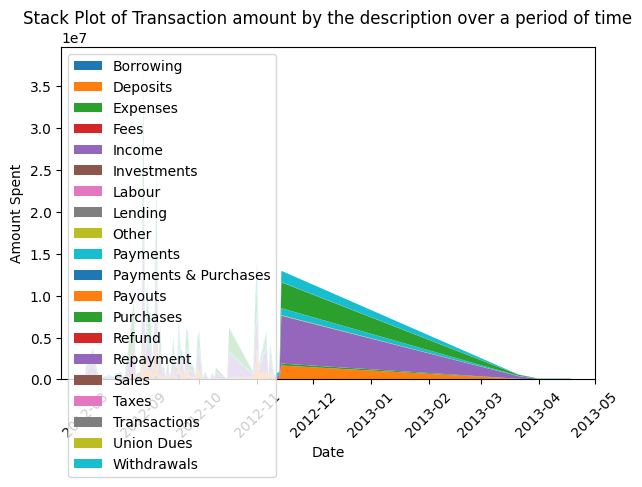

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stack_plot(csv_file):
    """
    Plot a stack plot of amount spent by purpose over time.
    """
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Convert 'Date' column to datetime
    try:
        df['Date'] = pd.to_datetime(df['first_trx_date_hh'], format='%d-%b-%y')
    except TypeError:
        df['Date'] = pd.to_datetime(df['first_trx_date_hh'])

    # Group by Date and Purpose, and sum the Amount for each group
    grouped = df.groupby(['Date', 'trx_prx_purpose_standardized'])['trx_value_kes'].sum().unstack(fill_value=0)

    # Plotting
    plt.stackplot(grouped.index, grouped.values.T, labels=grouped.columns, baseline='zero')
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Amount Spent')
    plt.title('Stack Plot of Transaction amount by the description over a period of time')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

cleaned.to_csv("/content/encoded_df.csv")
plot_stack_plot('/content/encoded_df.csv')

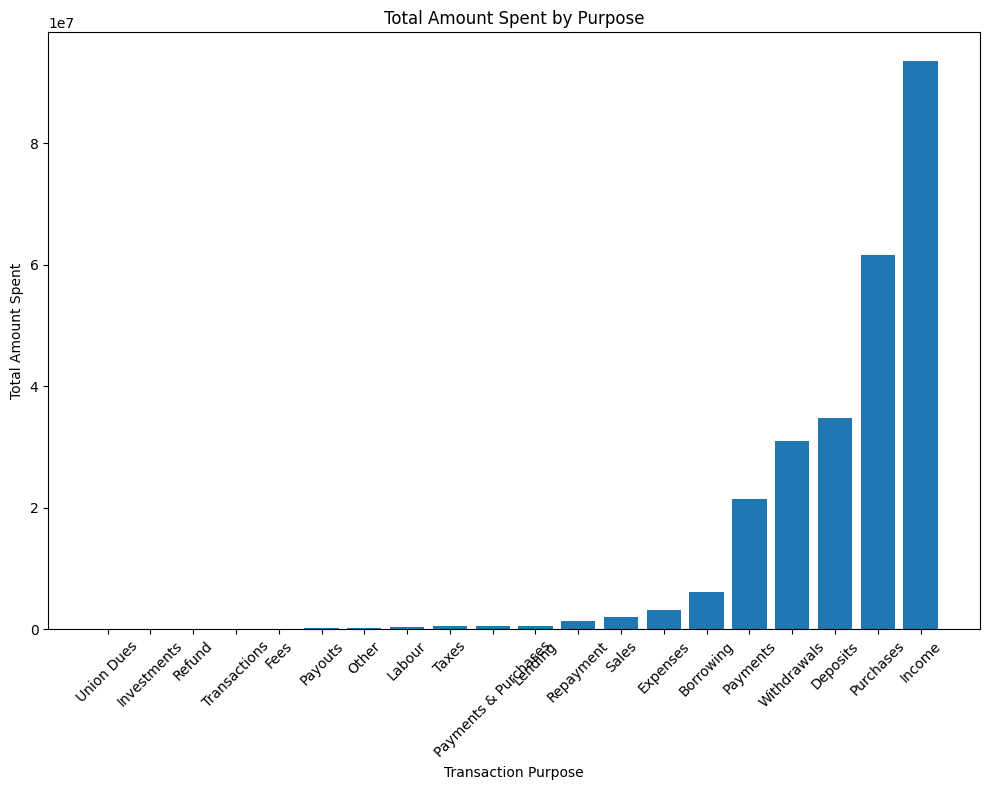

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_total_amount_by_purpose(csv_file):
    """
    Plot a bar graph showing the total amount spent for each purpose.
    """

    df = pd.read_csv(csv_file)

    grouped = df.groupby('trx_prx_purpose_standardized')['trx_value_kes'].sum().sort_values()

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(grouped.index, grouped.values)
    plt.xlabel('Transaction Purpose')
    plt.ylabel('Total Amount Spent')
    plt.title('Total Amount Spent by Purpose')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

cleaned.to_csv("/content/encoded_df.csv")
plot_total_amount_by_purpose('/content/encoded_df.csv')

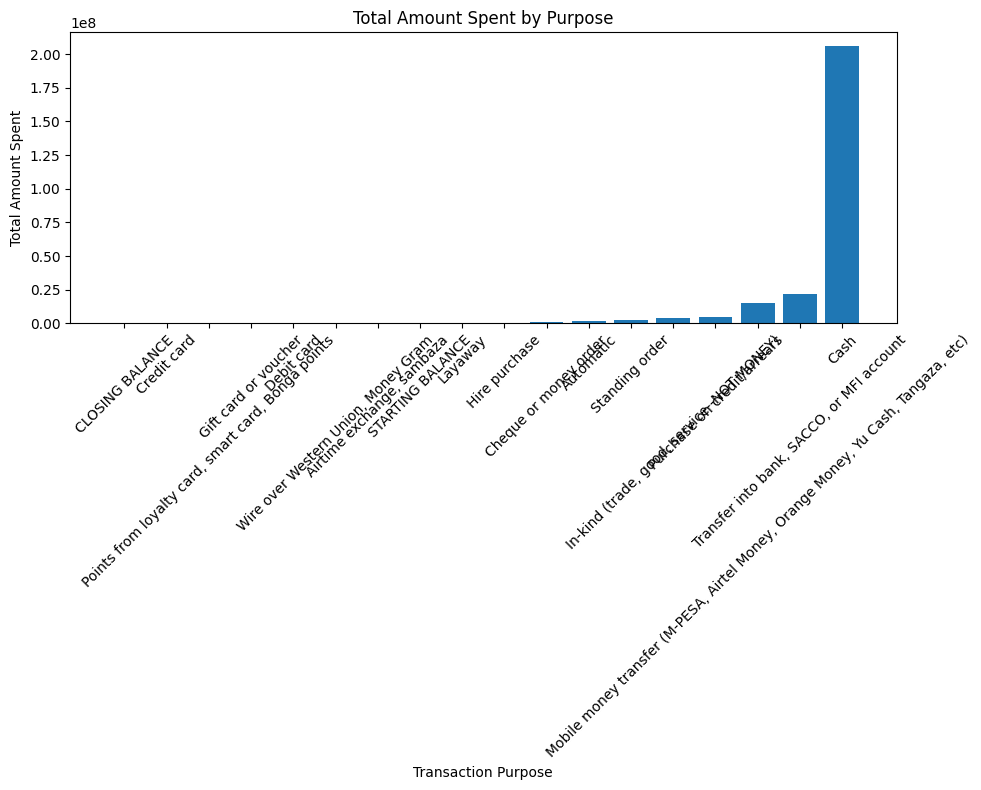

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_total_amount_by_purpose(csv_file):
    """
    Plot a bar graph showing the total amount spent for each purpose.
    """

    df = pd.read_csv(csv_file)

    grouped = df.groupby('trx_mode_desc')['trx_value_kes'].sum().sort_values()

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(grouped.index, grouped.values)
    plt.xlabel('Transaction Purpose')
    plt.ylabel('Total Amount Spent')
    plt.title('Total Amount Spent by Purpose')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

cleaned.to_csv("/content/encoded_df.csv")
plot_total_amount_by_purpose('/content/encoded_df.csv')

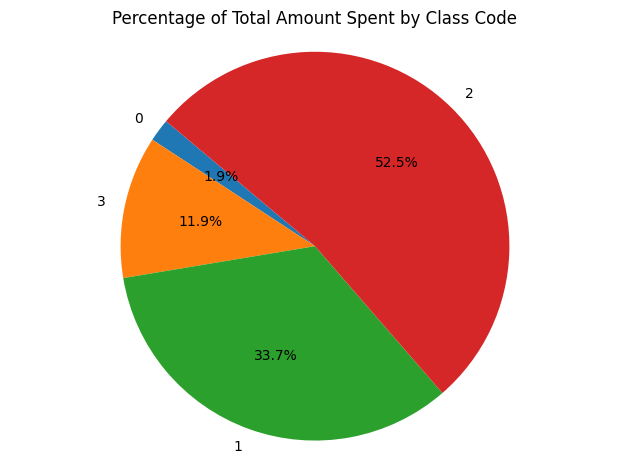

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_percentage_amount_by_class(csv_file):
    """
    Plot a pie chart showing the percentage of total amount spent for each class_code.
    """

    df = pd.read_csv(csv_file)

    total_amount = df['trx_value_kes'].sum()

    grouped = df.groupby('trx_class_code')['trx_value_kes'].sum().sort_values()

    percentages = (grouped / total_amount) * 100

    # Plotting
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Percentage of Total Amount Spent by Class Code')
    plt.tight_layout()
    plt.show()

cleaned.to_csv("/content/encoded_df.csv")
plot_percentage_amount_by_class('/content/encoded_df.csv')

#Feature Selection

##1.Correlation
Correlation is a statistical measure that reflects the degree to which two variables move in relation to each other.In feature selection, correlation is used to identify and remove highly correlated features to reduce redundancy and improve model performance.

Displaying total Unique categories in the dataset

In [ ]:
import pandas as pd

# List unique categories
for column in cleaned.columns:
    unique_categories = cleaned[column].value_counts()
    num_unique_categories = len(unique_categories)
    print(f"Column '{column}':")
    print(f"Total unique categories: {num_unique_categories}")

Column 'first_trx_date_hh':
Total unique categories: 73
Column 'last_trx_date_hh':
Total unique categories: 65
Column 'trx_class_code':
Total unique categories: 4
Column 'trx_class_desc':
Total unique categories: 4
Column 'trx_family_code':
Total unique categories: 40
Column 'trx_family_desc':
Total unique categories: 39
Column 'trx_type_code':
Total unique categories: 175
Column 'trx_type_desc':
Total unique categories: 175
Column 'trx_prx_purpose':
Total unique categories: 74
Column 'trx_mode_code':
Total unique categories: 18
Column 'trx_mode_desc':
Total unique categories: 18
Column 'trx_place_incommunity':
Total unique categories: 2
Column 'trx_direction':
Total unique categories: 2
Column 'trx_value_kes':
Total unique categories: 4220
Column 'trx_value_usd':
Total unique categories: 4220
Column 'trx_stdtime_mnths_hh_nr':
Total unique categories: 445
Column 'trx_class_numeric':
Total unique categories: 4
Column 'trx_family_code_numeric':
Total unique categories: 40
Column 'trx_typ

#### correlation matrix using seaborn library

In [ ]:
Columns_of_interest=['trx_class_code','trx_class_numeric','trx_family_code_numeric','trx_type_desc_numeric'
,'trx_prx_purpose_numeric','trx_value_kes','trx_direction_numeric']

#### Defining our columns of interest.

In [ ]:
subset = cleaned[Columns_of_interest]
subset.head(10)

,trx_class_code,trx_class_numeric,trx_family_code_numeric,trx_type_desc_numeric,trx_prx_purpose_numeric,trx_value_kes,trx_direction_numeric
0,1,0,0,0.000165,9,5000.0,1
1,3,1,1,0.021082,12,2816.0,1
2,3,1,2,0.003058,12,40.0,1
3,3,1,1,0.266565,12,50.0,1
4,2,2,3,0.025680,4,500.0,0
5,3,1,1,0.266565,12,35.0,1
6,3,1,4,0.053864,12,20.0,1
7,2,2,5,0.154073,4,100.0,0
8,3,1,1,0.266565,12,30.0,1
9,3,1,1,0.266565,12,60.0,1


In [ ]:
subset.columns

Index(['trx_class_code', 'trx_class_numeric', 'trx_family_code_numeric', 'trx_type_desc_numeric',
       'trx_prx_purpose_numeric', 'trx_value_kes', 'trx_direction_numeric'],
      dtype='object')

In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453511 entries, 0 to 453510
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trx_class_code           453511 non-null  int64  
 1   trx_class_numeric        453511 non-null  int64  
 2   trx_family_code_numeric  453511 non-null  int64  
 3   trx_type_desc_numeric    453511 non-null  float64
 4   trx_prx_purpose_numeric  453511 non-null  int8   
 5   trx_value_kes            453511 non-null  float64
 6   trx_direction_numeric    453511 non-null  int64  
dtypes: float64(2), int64(4), int8(1)
memory usage: 21.2 MB


In [ ]:
subset.head()

,trx_class_code,trx_class_numeric,trx_family_code_numeric,trx_type_desc_numeric,trx_prx_purpose_numeric,trx_value_kes,trx_direction_numeric
0,1,0,0,0.000165,9,5000.0,1
1,3,1,1,0.021082,12,2816.0,1
2,3,1,2,0.003058,12,40.0,1
3,3,1,1,0.266565,12,50.0,1
4,2,2,3,0.025680,4,500.0,0


In [ ]:
correlation_matrix = subset.corr()
# print(correlation_matrix)


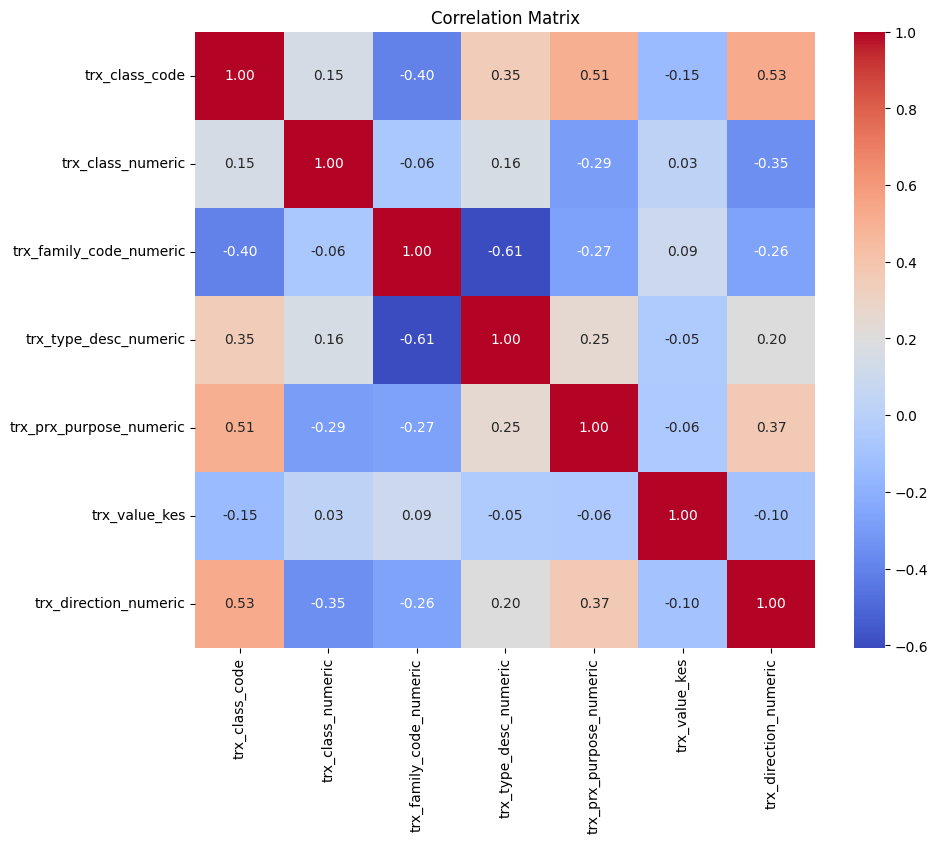

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


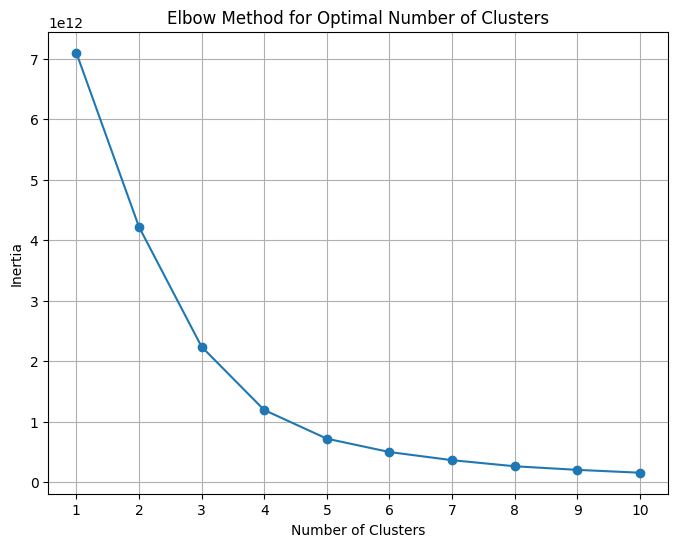

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering for different numbers of clusters and calculate inertia
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(subset)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
subset.columns

Index(['trx_class_code', 'trx_class_numeric', 'trx_family_code_numeric', 'trx_type_desc_numeric',
       'trx_prx_purpose_numeric', 'trx_value_kes', 'trx_direction_numeric'],
      dtype='object')

#A Distplot
depicts the variation in the data distribution.

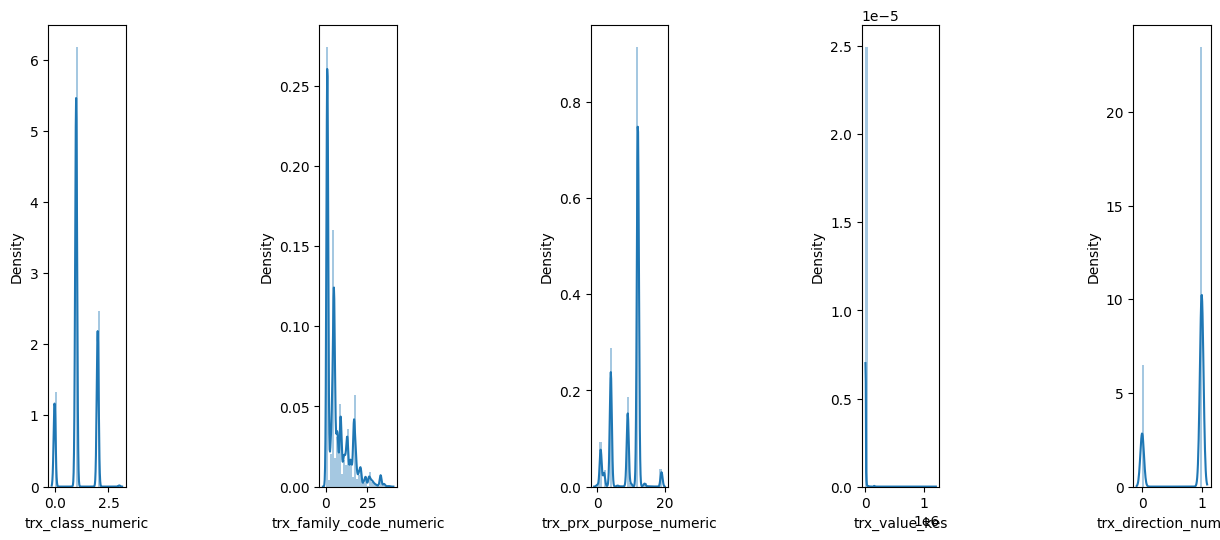

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['trx_class_numeric' , 'trx_family_code_numeric','trx_prx_purpose_numeric','trx_value_kes','trx_direction_numeric']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 1.5 , wspace = 2.5)
    sns.distplot(subset[x] , bins = 30)
    # plt.title('Distplot of {}'.format(x))
plt.show()

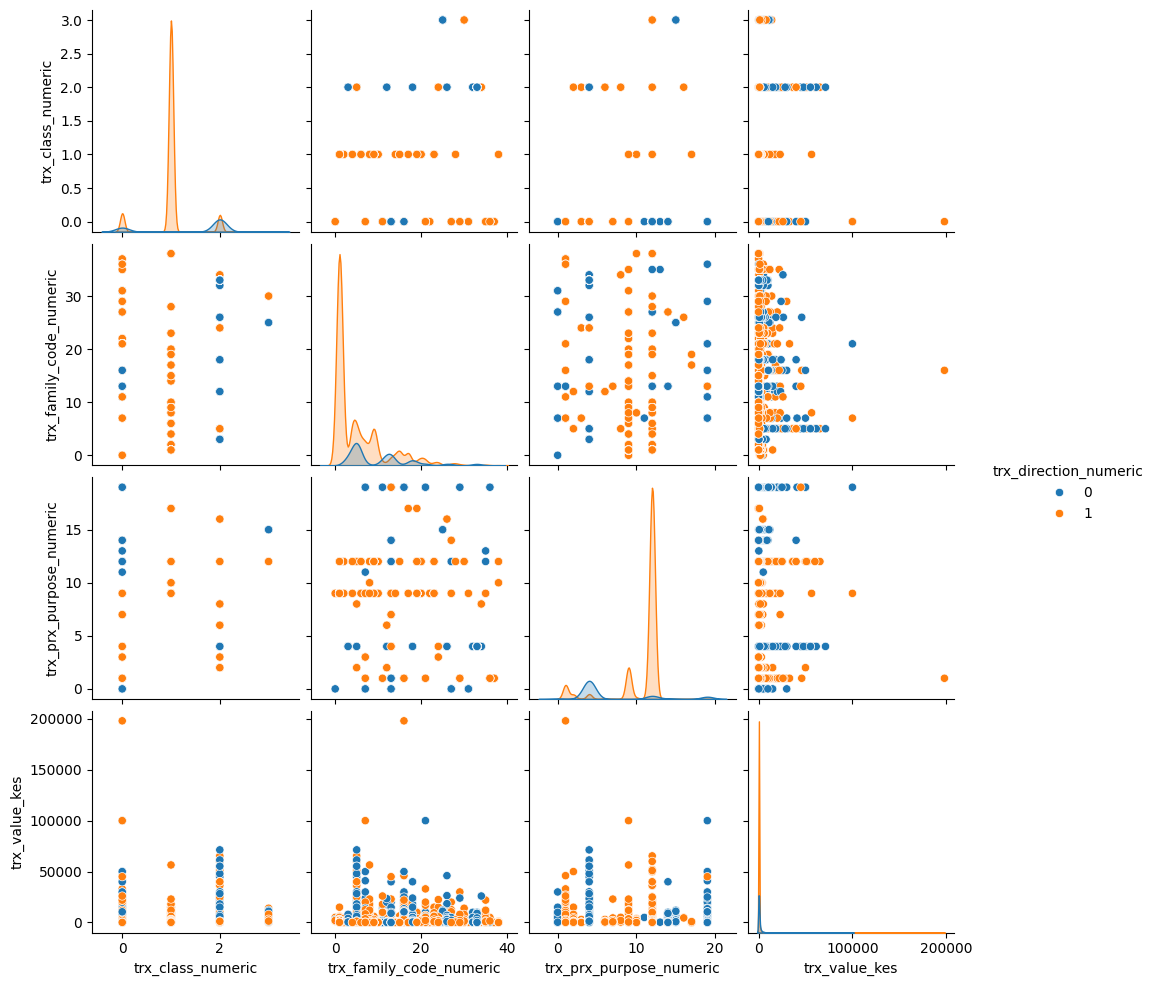

In [ ]:
sns.pairplot(subset.head(50000), vars = ['trx_class_numeric' ,'trx_family_code_numeric', 'trx_prx_purpose_numeric','trx_value_kes'], hue = "trx_direction_numeric")

#2D Clustering based on [Purpose and transaction Value](https://)¶

---




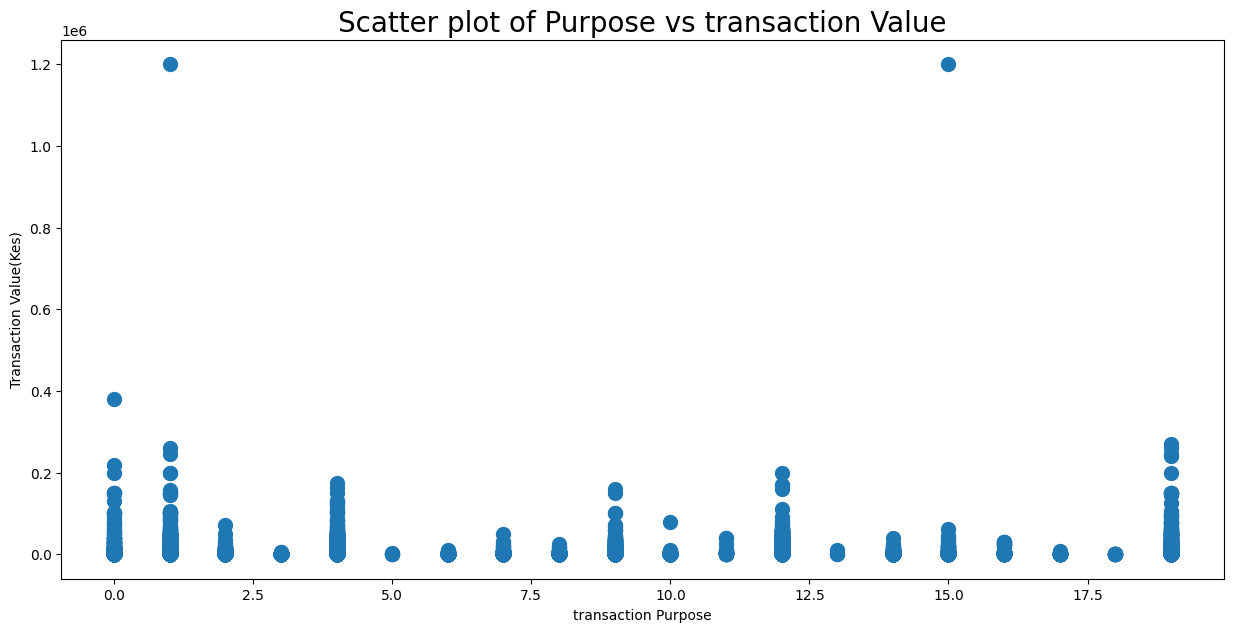

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Purpose vs transaction Value', fontsize = 20)
plt.xlabel('transaction Purpose')
plt.ylabel('Transaction Value(Kes)')
plt.scatter( x = 'trx_prx_purpose_numeric', y = 'trx_value_kes', data = subset, s = 100)
plt.show()

#2D Clustering based on transaction Family and transaction Purpose

---




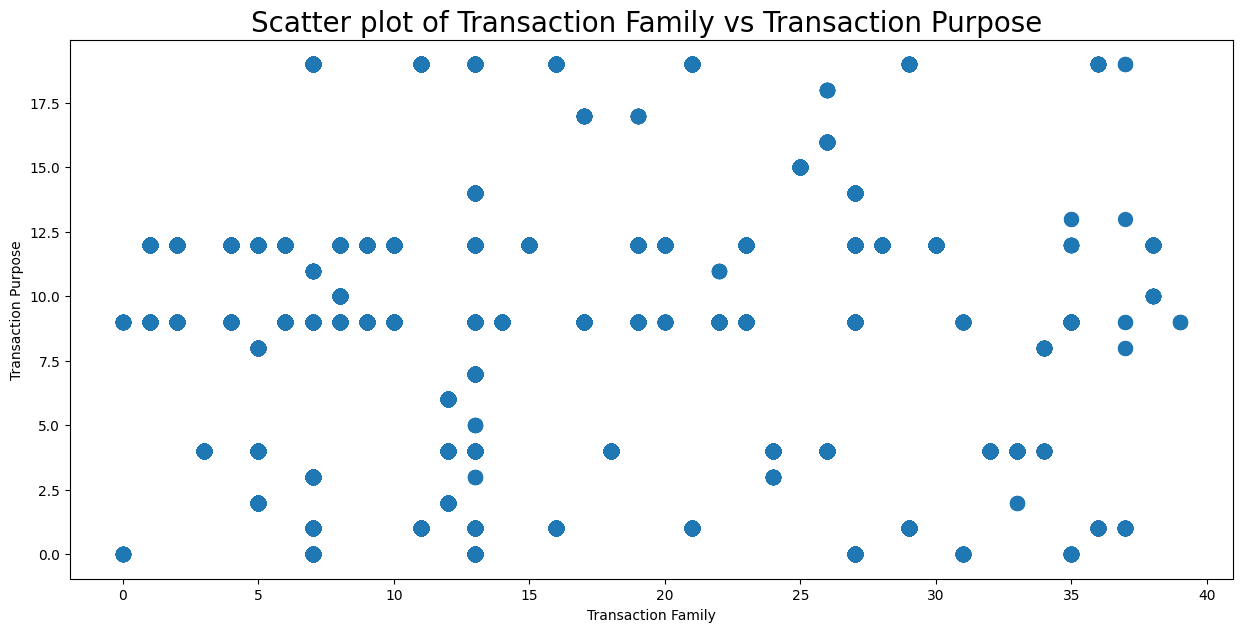

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Transaction Family vs Transaction Purpose ', fontsize = 20)
plt.xlabel('Transaction Family')
plt.ylabel('Transaction Purpose')
plt.scatter( x = 'trx_family_code_numeric', y = 'trx_prx_purpose_numeric', data = subset, s = 100)
plt.show()

##Deciding K value


In [ ]:
X1 = subset[['trx_family_code_numeric' , 'trx_prx_purpose_numeric']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

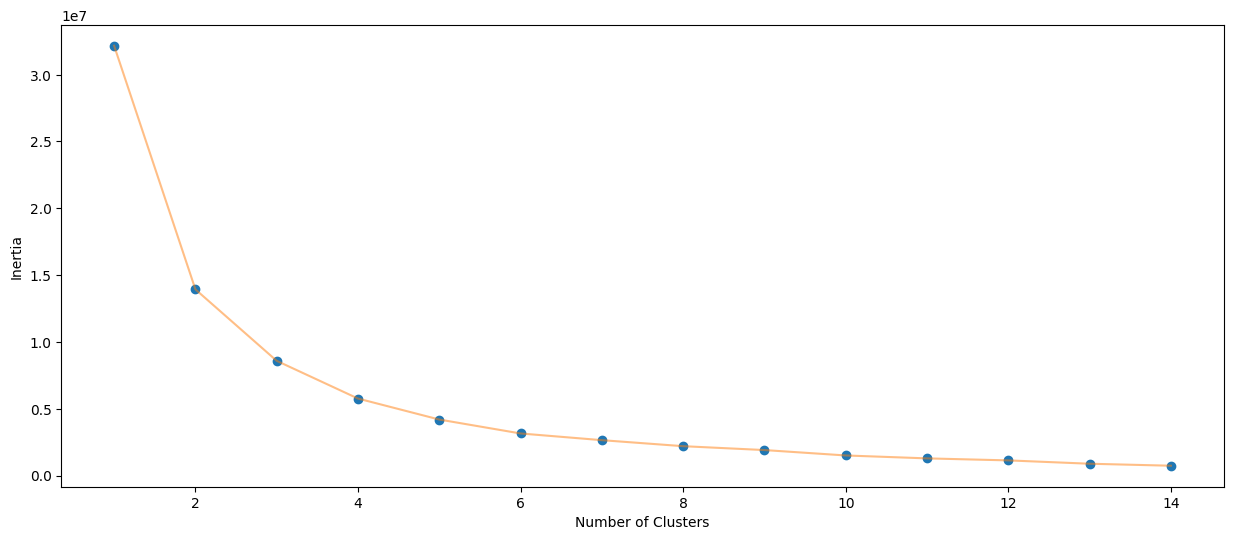

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

##Applying KMeans for k=4





In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

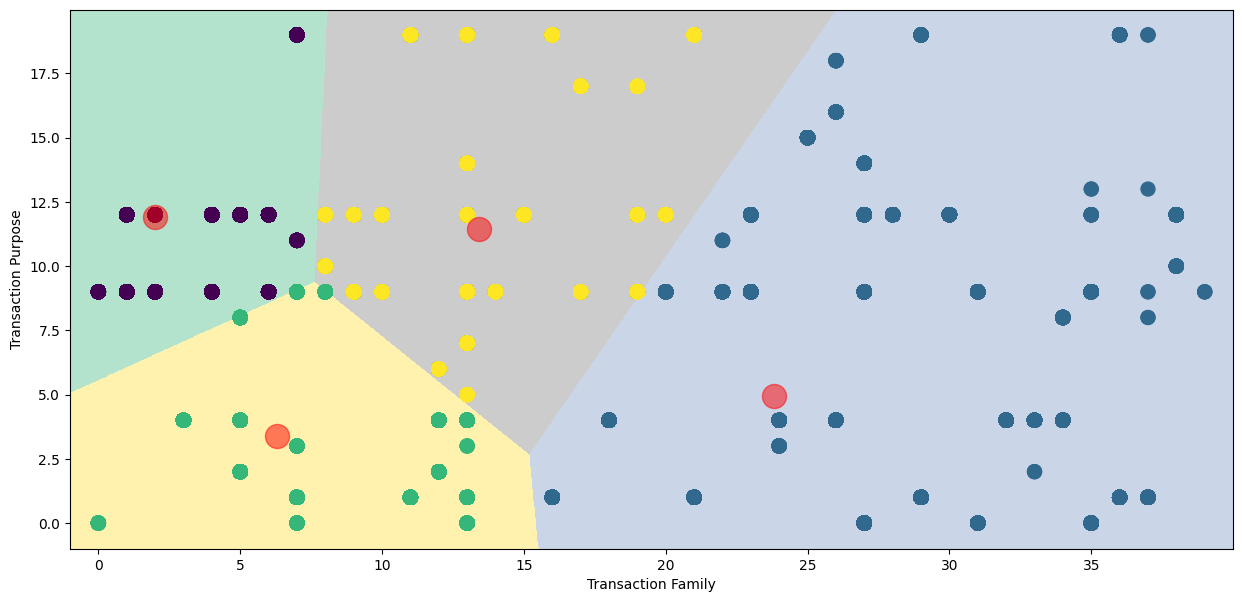

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'trx_family_code_numeric', y = 'trx_prx_purpose_numeric', data = subset, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Transaction Purpose') , plt.xlabel('Transaction Family')
plt.show()

##Applying KMeans for k=5


In [ ]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

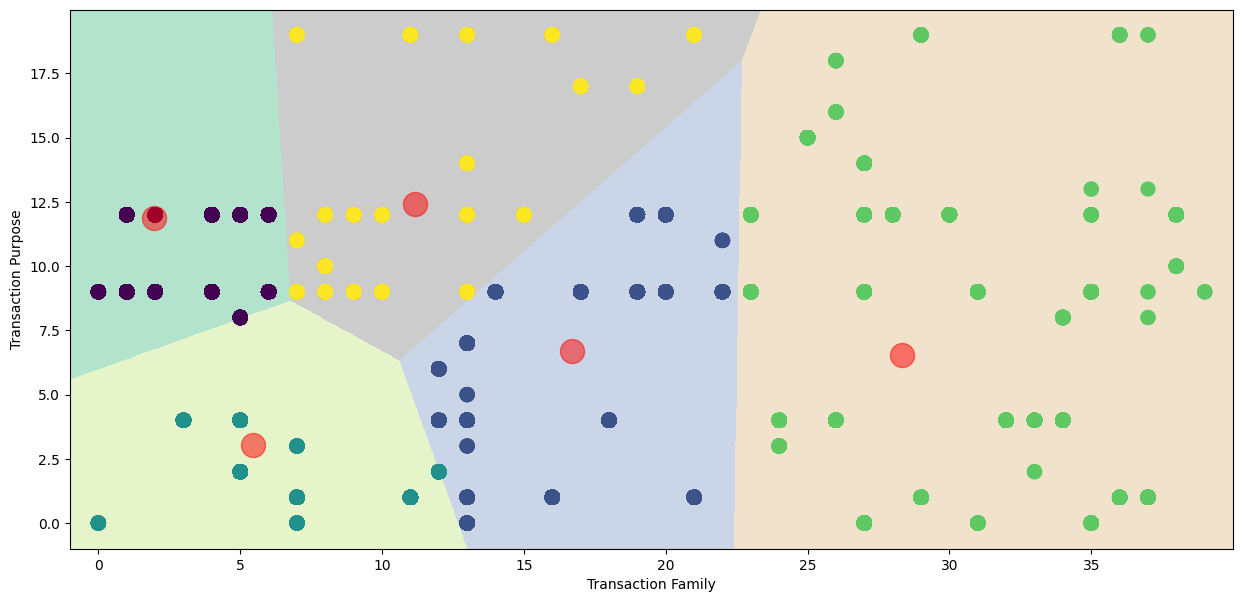

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'trx_family_code_numeric', y = 'trx_prx_purpose_numeric', data = subset, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Transaction Purpose') , plt.xlabel('Transaction Family')
plt.show()

#**2D Clustering based on Transaction Purpose and Transaction Direction**





In [ ]:
X2 = subset[['trx_prx_purpose_numeric' , 'trx_direction_numeric']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

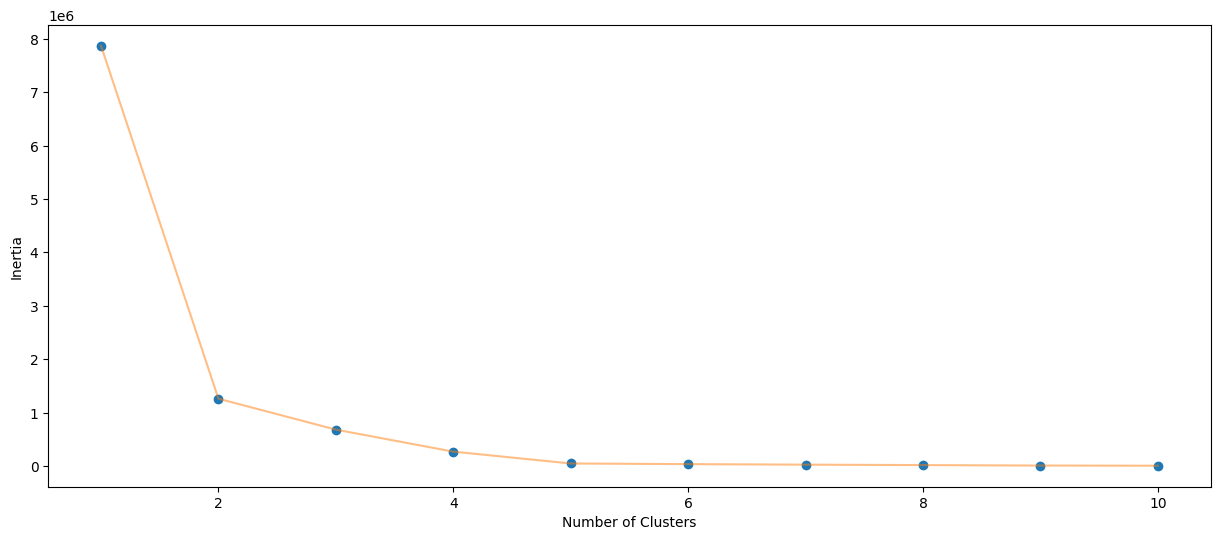

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

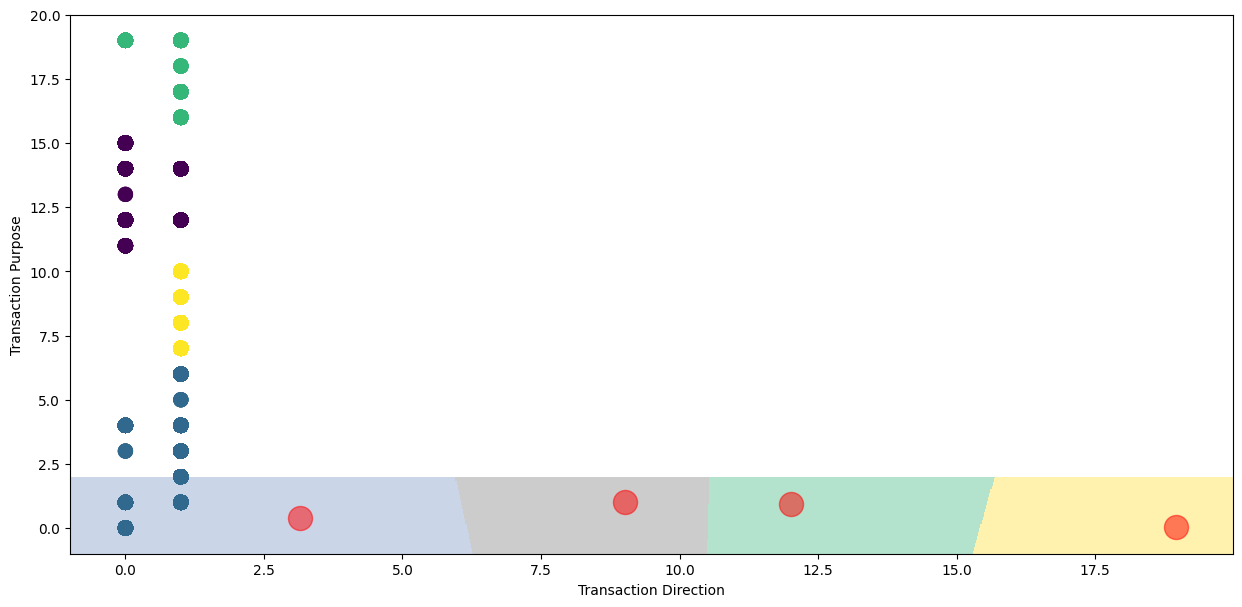

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'trx_direction_numeric' ,y = 'trx_prx_purpose_numeric' , data = subset , c = labels2 ,
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Transaction Purpose') , plt.xlabel('Transaction Direction')
plt.show()

#**3D Clustering based on Transaction Family, Purpose , direction , and value**




In [ ]:
# X3 = subset[['trx_family_code_numeric' , 'trx_prx_purpose_numeric','trx_value_kes' ,'trx_direction_numeric']].iloc[: , :].values
# inertia = []
# for n in range(1 , 11):
#     algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
#                         tol=0.0001, random_state= 111, algorithm='elkan'))
#     algorithm.fit(X3)
#     inertia.append(algorithm.inertia_)

In [ ]:
X3 = subset[['trx_family_code_numeric' , 'trx_prx_purpose_numeric' ,'trx_direction_numeric']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

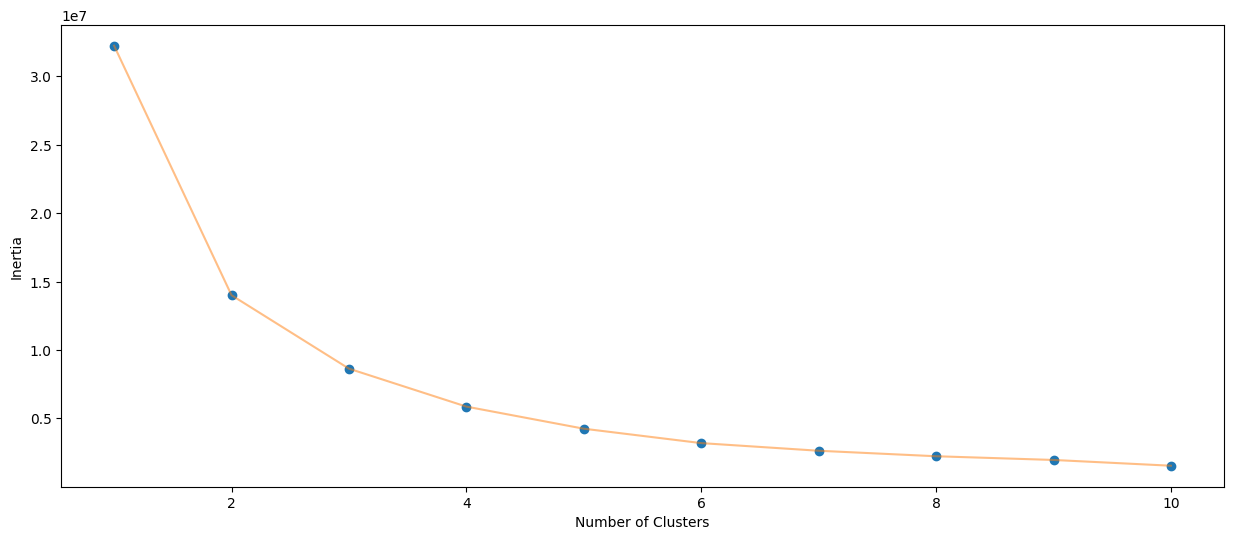

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
subset['cluster'] = pd.DataFrame(y_kmeans)
subset.head(20)

,trx_class_code,trx_class_numeric,trx_family_code_numeric,trx_type_desc_numeric,trx_prx_purpose_numeric,trx_value_kes,trx_direction_numeric,cluster
0,1,0,0,0.000165,9,5000.0,1,0
1,3,1,1,0.021082,12,2816.0,1,0
2,3,1,2,0.003058,12,40.0,1,0
3,3,1,1,0.266565,12,50.0,1,0
4,2,2,3,0.025680,4,500.0,0,0
5,3,1,1,0.266565,12,35.0,1,0
6,3,1,4,0.053864,12,20.0,1,0
7,2,2,5,0.154073,4,100.0,0,0
8,3,1,1,0.266565,12,30.0,1,0
9,3,1,1,0.266565,12,60.0,1,0


In [ ]:
subset.head(20)

,trx_class_code,trx_class_numeric,trx_family_code_numeric,trx_type_desc_numeric,trx_prx_purpose_numeric,trx_value_kes,trx_direction_numeric,cluster
0,1,0,0,0.000165,9,5000.0,1,0
1,3,1,1,0.021082,12,2816.0,1,0
2,3,1,2,0.003058,12,40.0,1,0
3,3,1,1,0.266565,12,50.0,1,0
4,2,2,3,0.025680,4,500.0,0,0
5,3,1,1,0.266565,12,35.0,1,0
6,3,1,4,0.053864,12,20.0,1,0
7,2,2,5,0.154073,4,100.0,0,0
8,3,1,1,0.266565,12,30.0,1,0
9,3,1,1,0.266565,12,60.0,1,0


In [ ]:
subset['cluster'].unique()

array([0, 1], dtype=int32)

In [ ]:
# Save the DataFrame to a CSV file
subset.to_csv('subset.csv', index=False)

#**Classification**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
subset.columns

Index(['trx_class_code', 'trx_class_numeric', 'trx_family_code_numeric', 'trx_type_desc_numeric',
       'trx_prx_purpose_numeric', 'trx_value_kes', 'trx_direction_numeric', 'cluster'],
      dtype='object')

In [ ]:
# Split the data into features and target
X = subset.drop(['cluster'], axis=1)
y = subset['cluster']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Support Vector Machine (SVM) classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [ ]:
accuracy=accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy)
cl_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", cl_report)

In [ ]:
# Random Forest classifier
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

